#**Assignment**
**Data Analysis Practice**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the URL of the CSV file.
url = "https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv"

# Read the CSV into a DataFrame called df.
df = pd.read_csv(url)

# Print the first 5 rows to verify data loading.
print("Data Sample:")
df.head()

Data Sample:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

1. Total Revenue for Bikes: 61782134
2. Total Revenue per Category: {'Accessories': np.int64(15117992), 'Clothing': np.int64(8370882), 'Bikes': np.int64(61782134)}


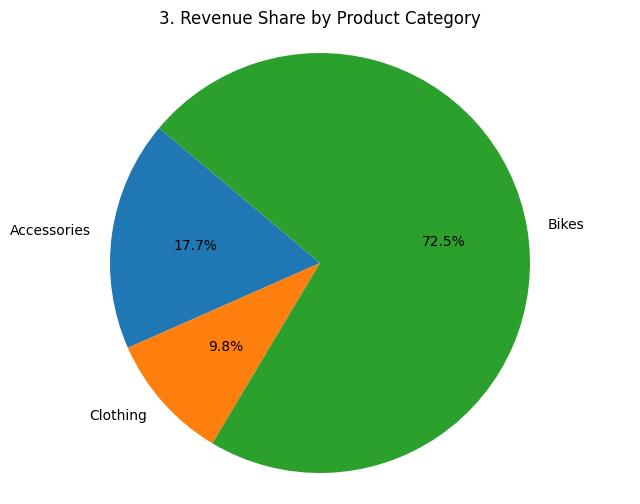

4. Total Transactions for Accessories: 70120


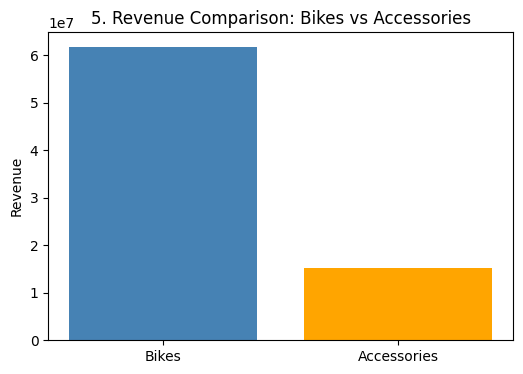

In [ ]:
# Practice Exercises for Analysis 1:


# 1. Calculate total revenue for "Bikes" using filtering
bikes_revenue = df[df['Product_Category'] == 'Bikes']['Revenue'].sum()
print("1. Total Revenue for Bikes:", bikes_revenue)

# 2. Calculate total revenue for each product category without using groupby
category_revenue = {}
for category in df['Product_Category'].unique():
    total = df[df['Product_Category'] == category]['Revenue'].sum()
    category_revenue[category] = total
print("2. Total Revenue per Category:", category_revenue)

# 3. Create a pie chart that shows the percentage of revenue for each product category
plt.figure(figsize=(8, 6))
plt.pie(category_revenue.values(), labels=category_revenue.keys(), autopct='%1.1f%%', startangle=140)
plt.title("3. Revenue Share by Product Category")
plt.axis('equal')
plt.show()

# 4. Find the total number of transactions for "Accessories"
# Using 'Order_Quantity' as a proxy for transactions (each row is an order line)
accessories_transactions = df[df['Product_Category'] == 'Accessories'].shape[0]
print("4. Total Transactions for Accessories:", accessories_transactions)

# 5. Compare total revenue for two chosen product categories side by side
compare_categories = ['Bikes', 'Accessories']  # You can modify these
compare_revenue = [category_revenue.get(cat, 0) for cat in compare_categories]

plt.figure(figsize=(6, 4))
plt.bar(compare_categories, compare_revenue, color=['steelblue', 'orange'])
plt.title("5. Revenue Comparison: Bikes vs Accessories")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# Ensure 'Month' column is treated as a string for easy matching
df['Month'] = df['Month'].astype(str)

# 1. Total revenue for April
april_revenue = df[df['Month'] == 'April']['Revenue'].sum()
print("1. Total Revenue for April:", april_revenue)

# 2. Compare total revenue of March vs. September
march_revenue = df[df['Month'] == 'March']['Revenue'].sum()
september_revenue = df[df['Month'] == 'September']['Revenue'].sum()
print("2. Revenue - March:", march_revenue)
print("   Revenue - September:", september_revenue)

# 3. Average revenue in March
march_avg_revenue = df[df['Month'] == 'March']['Revenue'].mean()
print("3. Average Revenue in March:", march_avg_revenue)

# 4. Identify month with highest total revenue
monthly_revenue = {}
for month in df['Month'].unique():
    total = df[df['Month'] == month]['Revenue'].sum()
    monthly_revenue[month] = total

highest_month = max(monthly_revenue, key=monthly_revenue.get)
print(f"4. Month with Highest Revenue: {highest_month} (${monthly_revenue[highest_month]:,.2f})")

1. Total Revenue for April: 7602750
2. Revenue - March: 7347164
   Revenue - September: 5841885
3. Average Revenue in March: 759.4752946040934
4. Month with Highest Revenue: December ($9,086,931.00)


1. Total Revenue by Country:
Canada: $7,935,738.00
Australia: $21,302,059.00
United States: $27,975,547.00
Germany: $8,978,596.00
France: $8,432,872.00
United Kingdom: $10,646,196.00

2. Country with Lowest Revenue: Canada ($7,935,738.00)


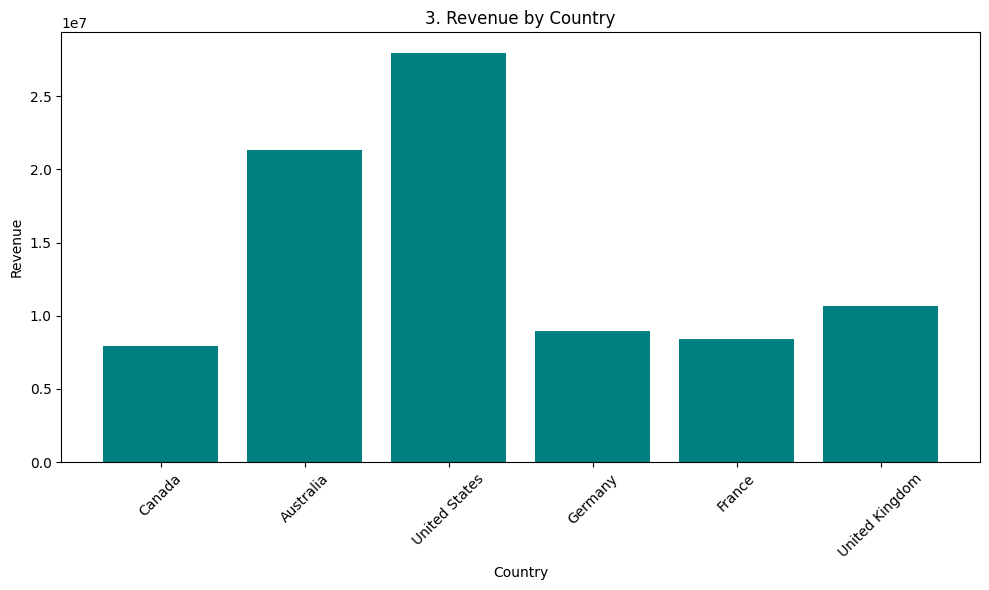


4. Revenue Percentage by Country:
Canada: 9.31%
Australia: 24.98%
United States: 32.81%
Germany: 10.53%
France: 9.89%
United Kingdom: 12.49%

5. Total Profit for United States: $11,073,644.00


In [ ]:
# Practice Exercises for Analysis 3:
# 1. List all countries with their total revenue
country_revenue = {}
for country in df['Country'].unique():
    total = df[df['Country'] == country]['Revenue'].sum()
    country_revenue[country] = total
print("1. Total Revenue by Country:")
for country, revenue in country_revenue.items():
    print(f"{country}: ${revenue:,.2f}")

# 2. Find the country with the lowest total revenue
lowest_country = min(country_revenue, key=country_revenue.get)
print(f"\n2. Country with Lowest Revenue: {lowest_country} (${country_revenue[lowest_country]:,.2f})")

# 3. Bar chart showing revenue per country
plt.figure(figsize=(10, 6))
plt.bar(country_revenue.keys(), country_revenue.values(), color='teal')
plt.title("3. Revenue by Country")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Calculate percentage of total revenue from each country
total_revenue = df['Revenue'].sum()
country_percentages = {country: (rev / total_revenue) * 100 for country, rev in country_revenue.items()}
print("\n4. Revenue Percentage by Country:")
for country, percent in country_percentages.items():
    print(f"{country}: {percent:.2f}%")

# 5. Filter transactions from a specific country and find their total profit
specific_country = 'United States'  # Change as needed
country_profit = df[df['Country'] == specific_country]['Profit'].sum()
print(f"\n5. Total Profit for {specific_country}: ${country_profit:,.2f}")

1. Total Revenue for California: $17,672,620.00
1. Total Revenue for Texas: $6,835.00


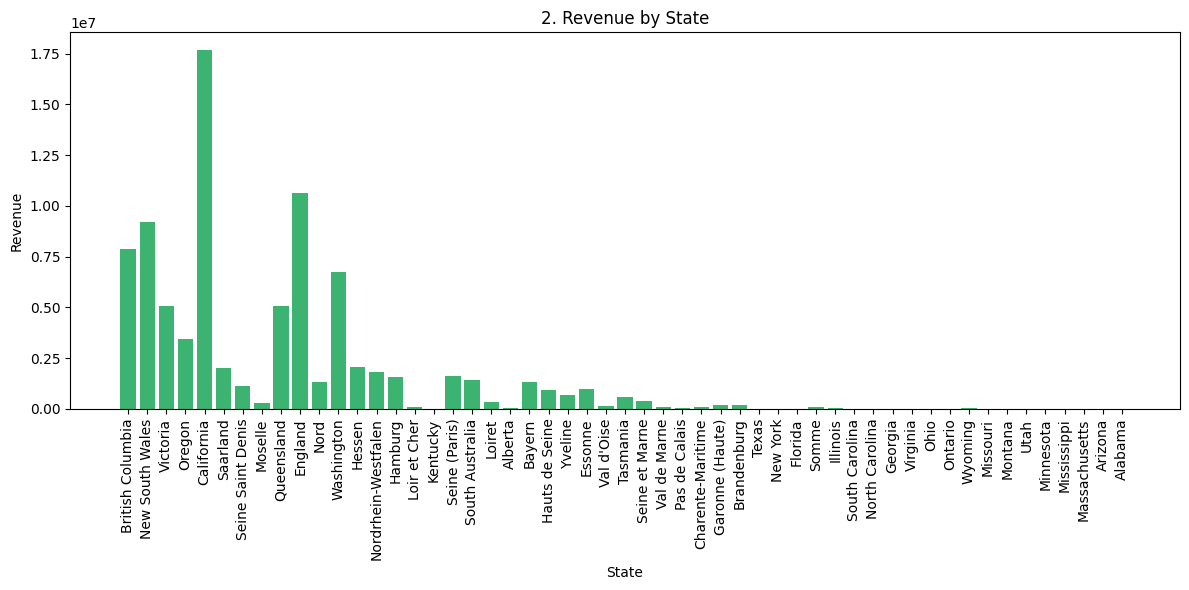

3. State with Highest Transactions: California (22450 transactions)
4. Average Revenue per Transaction in Washington: $598.50
5. Revenue in California by Year:
2011: $1,870,178.00
2012: $1,981,377.00
2013: $3,140,474.00
2014: $2,996,200.00
2015: $4,024,256.00
2016: $3,660,135.00


In [ ]:
 #1 Calculate total revenue for two other states
states_to_check = ['California', 'Texas']  # Change to any two states
for state in states_to_check:
    total = df[df['State'] == state]['Revenue'].sum()
    print(f"1. Total Revenue for {state}: ${total:,.2f}")

# 2. Compare revenue across all states using a simple plot
state_revenue = {}
for state in df['State'].unique():
    total = df[df['State'] == state]['Revenue'].sum()
    state_revenue[state] = total

plt.figure(figsize=(12, 6))
plt.bar(state_revenue.keys(), state_revenue.values(), color='mediumseagreen')
plt.title("2. Revenue by State")
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. State with highest number of transactions
state_transaction_counts = df['State'].value_counts()
top_state = state_transaction_counts.idxmax()
top_count = state_transaction_counts.max()
print(f"3. State with Highest Transactions: {top_state} ({top_count} transactions)")

# 4. Average revenue per transaction for a chosen state
chosen_state = 'Washington'  # Change as needed
state_data = df[df['State'] == chosen_state]
avg_revenue = state_data['Revenue'].mean()
print(f"4. Average Revenue per Transaction in {chosen_state}: ${avg_revenue:,.2f}")

# 5. Filter and compare revenue for a state between different years
compare_state = 'California'  # Change as needed
years = df['Year'].unique()

print(f"5. Revenue in {compare_state} by Year:")
for year in sorted(years):
    yearly_revenue = df[(df['State'] == compare_state) & (df['Year'] == year)]['Revenue'].sum()
    print(f"{year}: ${yearly_revenue:,.2f}")

In [ ]:
# 1. Compute the average revenue from male customers
male_avg_revenue = df[df['Customer_Gender'] == 'M']['Revenue'].mean()
print(f"1. Average Revenue (Male Customers): ${male_avg_revenue:,.2f}")

# 2. Compare average revenue of male vs. female customers
female_avg_revenue = df[df['Customer_Gender'] == 'F']['Revenue'].mean()
print(f"2. Average Revenue (Female Customers): ${female_avg_revenue:,.2f}")
print(f"   Difference: ${abs(male_avg_revenue - female_avg_revenue):,.2f}")

# 3. Calculate median revenue for female customers
female_median_revenue = df[df['Customer_Gender'] == 'F']['Revenue'].median()
print(f"3. Median Revenue (Female Customers): ${female_median_revenue:,.2f}")

# 4. Standard deviation of revenue for female customers
female_std_revenue = df[df['Customer_Gender'] == 'F']['Revenue'].std()
print(f"4. Std Dev of Revenue (Female Customers): ${female_std_revenue:,.2f}")

# 5. Filter transactions with revenue higher than the overall average and count them by gender
overall_avg_revenue = df['Revenue'].mean()
above_avg_df = df[df['Revenue'] > overall_avg_revenue]
gender_counts = above_avg_df['Customer_Gender'].value_counts()
print("5. Number of Transactions with Revenue Above Average by Gender:")
print(gender_counts)

1. Average Revenue (Male Customers): $743.16
2. Average Revenue (Female Customers): $766.31
   Difference: $23.15
3. Median Revenue (Female Customers): $211.00
4. Std Dev of Revenue (Female Customers): $1,303.32
5. Number of Transactions with Revenue Above Average by Gender:
Customer_Gender
M    15150
F    14576
Name: count, dtype: int64


In [ ]:
# Practice Exercises for Analysis 7:

# 1. Count the number of transactions for another specific product
specific_product = 'Headphones'  # Change to the product you're interested in
product_transactions = df[df['Product'] == specific_product].shape[0]
print(f"1. Number of Transactions for {specific_product}: {product_transactions}")

# 2. Compare the count of transactions between two different products
product_1 = 'Bikes'  # Change to the first product
product_2 = 'Headphones'  # Change to the second product

product_1_transactions = df[df['Product'] == product_1].shape[0]
product_2_transactions = df[df['Product'] == product_2].shape[0]

print(f"2. Transactions for {product_1}: {product_1_transactions}")
print(f"   Transactions for {product_2}: {product_2_transactions}")

# 3. Calculate the proportion of transactions for a specific product to total transactions
total_transactions = df.shape[0]
specific_product_transactions = df[df['Product'] == specific_product].shape[0]
proportion = specific_product_transactions / total_transactions
print(f"3. Proportion of Transactions for {specific_product}: {proportion:.2%}")

# 4. Identify transactions for a specific product that exceed a certain revenue
revenue_threshold = 1000  # Change the threshold as needed
product_exceeding_revenue = df[(df['Product'] == specific_product) & (df['Revenue'] > revenue_threshold)]
print(f"4. Transactions for {specific_product} exceeding ${revenue_threshold}: {product_exceeding_revenue.shape[0]}")

# 5. Filter transactions for a specific product by year and count them
product_year = df[(df['Product'] == specific_product) & (df['Year'] == 2020)]  # Change year as needed
yearly_count = product_year.shape[0]
print(f"5. Transactions for {specific_product} in 2020: {yearly_count}")

1. Number of Transactions for Headphones: 0
2. Transactions for Bikes: 0
   Transactions for Headphones: 0
3. Proportion of Transactions for Headphones: 0.00%
4. Transactions for Headphones exceeding $1000: 0
5. Transactions for Headphones in 2020: 0


1. Product Categories in Order of Transaction Frequency:
Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

2. Product Category with Second Highest Transaction Frequency: Bikes


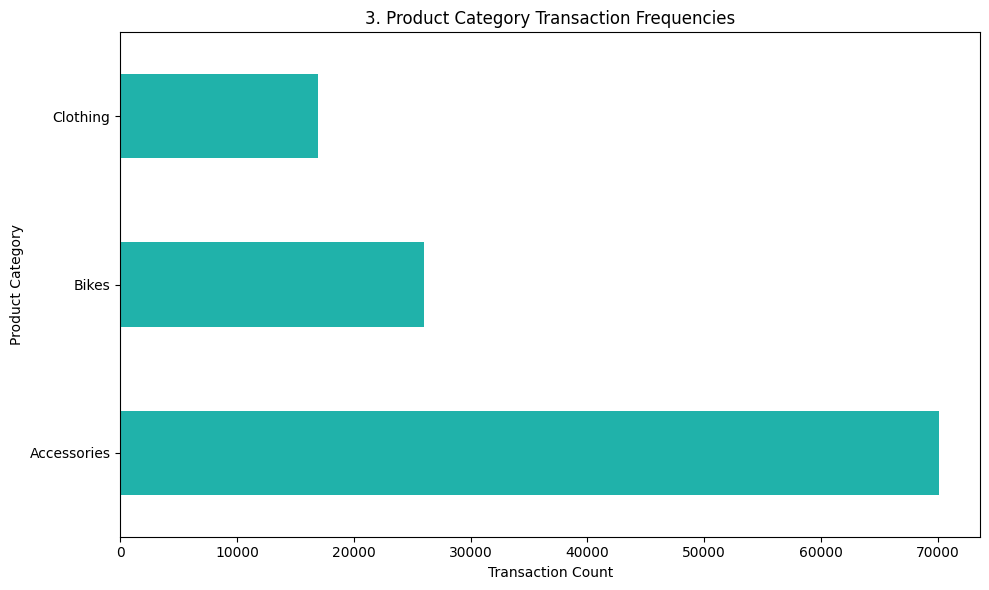


4. Percentage Share of Each Product Category:
Product_Category
Accessories    62.033335
Bikes          22.985598
Clothing       14.981068
Name: count, dtype: float64

5. Product Categories with Fewer Than 500 Transactions:
Series([], Name: count, dtype: int64)


In [ ]:
# Practice Exercises for Analysis 8:

# 1. List product categories in order of transaction frequency
category_counts = df['Product_Category'].value_counts()
print("1. Product Categories in Order of Transaction Frequency:")
print(category_counts)

# 2. Find the product category with the second highest transaction frequency
second_highest_category = category_counts.nlargest(2).idxmin()
print(f"\n2. Product Category with Second Highest Transaction Frequency: {second_highest_category}")

# 3. Plot a horizontal bar chart of product category frequencies
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='lightseagreen')
plt.title("3. Product Category Transaction Frequencies")
plt.xlabel("Transaction Count")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# 4. Determine the percentage share of each product category
total_transactions = df.shape[0]
category_percentages = (category_counts / total_transactions) * 100
print("\n4. Percentage Share of Each Product Category:")
print(category_percentages)

# 5. Identify product categories that have fewer than a specified number of transactions
threshold = 500  # Change this to the threshold you want
low_frequency_categories = category_counts[category_counts < threshold]
print(f"\n5. Product Categories with Fewer Than {threshold} Transactions:")
print(low_frequency_categories)

1. Number of Transactions by Age Group:
Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

2. Average Revenue by Age Group:
Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64

3. Ratio of Youth Sales to Adult Sales: nan

4. Transactions from Adult with Revenue Above $1000: 0


<ipython-input-13-7da4107be808>:15: RuntimeWarning: invalid value encountered in scalar divide
  revenue_ratio = youth_revenue / adult_revenue


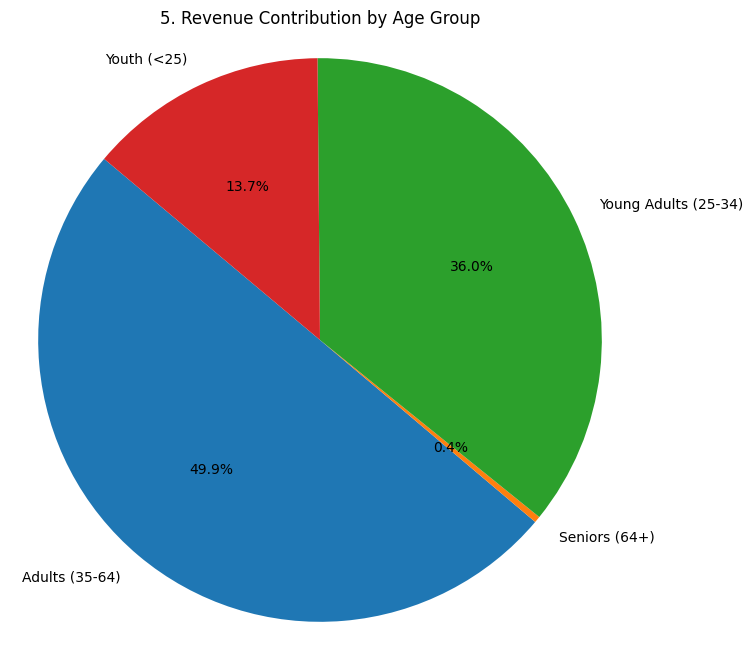

In [ ]:
# Practice Exercises for Analysis 9:
# 1. Calculate the number of transactions for each age group
age_group_counts = df['Age_Group'].value_counts()
print("1. Number of Transactions by Age Group:")
print(age_group_counts)

# 2. Compare the average revenue between different age groups
age_group_avg_revenue = df.groupby('Age_Group')['Revenue'].mean()
print("\n2. Average Revenue by Age Group:")
print(age_group_avg_revenue)

# 3. Determine the ratio of Youth sales to Adult sales
youth_revenue = df[df['Age_Group'] == 'Youth']['Revenue'].sum()
adult_revenue = df[df['Age_Group'] == 'Adult']['Revenue'].sum()
revenue_ratio = youth_revenue / adult_revenue
print(f"\n3. Ratio of Youth Sales to Adult Sales: {revenue_ratio:.2f}")

# 4. Filter transactions from a specific age group that exceed a certain revenue
age_group = 'Adult'  # Change this to the age group you're interested in
revenue_threshold = 1000  # Set your threshold here
high_revenue_transactions = df[(df['Age_Group'] == age_group) & (df['Revenue'] > revenue_threshold)]
print(f"\n4. Transactions from {age_group} with Revenue Above ${revenue_threshold}: {high_revenue_transactions.shape[0]}")

# 5. Plot a pie chart showing the revenue contribution of different age groups
age_group_revenue = df.groupby('Age_Group')['Revenue'].sum()
plt.figure(figsize=(8, 8))
plt.pie(age_group_revenue, labels=age_group_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("5. Revenue Contribution by Age Group")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

1. Product Sub-Categories in Ascending Order of Frequency:
Sub_Category
Bike Stands            456
Bike Racks             592
Vests                  964
Socks                 1122
Hydration Packs       1334
Shorts                1794
Cleaners              1802
Gloves                2686
Touring Bikes         3698
Fenders               4032
Caps                  4358
Jerseys               6010
Mountain Bikes        8854
Helmets              12158
Road Bikes           13430
Bottles and Cages    15876
Tires and Tubes      33870
Name: count, dtype: int64

2. Total Revenue for Least Sold Sub-Category (Bike Stands): $344,075.00

3. Average Revenue for Least Sold Sub-Category (Bike Stands): $754.55
   Average Revenue for Most Sold Sub-Category (Tires and Tubes): $137.91

4. Number of Transactions for Least Sold Sub-Category (Bike Stands): 456


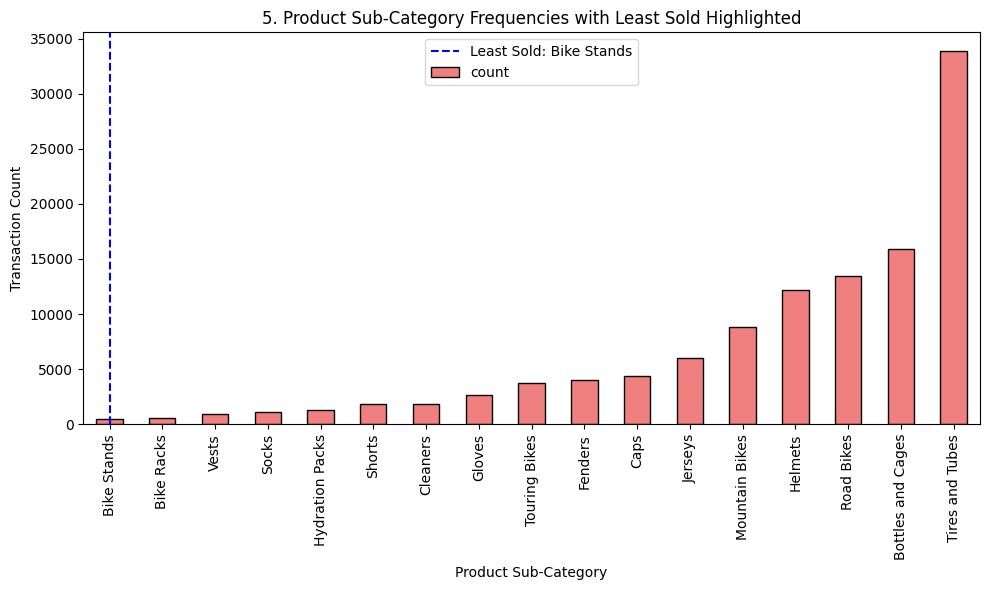

In [ ]:
# Practice Exercises for Analysis 10:
# 1. List the product sub-categories in ascending order of frequency
sub_category_counts = df['Sub_Category'].value_counts().sort_values(ascending=True)
print("1. Product Sub-Categories in Ascending Order of Frequency:")
print(sub_category_counts)

# 2. Calculate the total revenue for the least sold product sub-category
least_sold_sub_category = sub_category_counts.idxmin()
least_sold_revenue = df[df['Sub_Category'] == least_sold_sub_category]['Revenue'].sum()
print(f"\n2. Total Revenue for Least Sold Sub-Category ({least_sold_sub_category}): ${least_sold_revenue:,.2f}")

# 3. Compare the average revenue of the least sold sub-category to the most sold one
most_sold_sub_category = sub_category_counts.idxmax()
least_sold_avg_revenue = df[df['Sub_Category'] == least_sold_sub_category]['Revenue'].mean()
most_sold_avg_revenue = df[df['Sub_Category'] == most_sold_sub_category]['Revenue'].mean()
print(f"\n3. Average Revenue for Least Sold Sub-Category ({least_sold_sub_category}): ${least_sold_avg_revenue:,.2f}")
print(f"   Average Revenue for Most Sold Sub-Category ({most_sold_sub_category}): ${most_sold_avg_revenue:,.2f}")

# 4. Identify the number of transactions for the least sold product sub-category
least_sold_transactions = df[df['Sub_Category'] == least_sold_sub_category].shape[0]
print(f"\n4. Number of Transactions for Least Sold Sub-Category ({least_sold_sub_category}): {least_sold_transactions}")

# 5. Plot a bar chart highlighting the least sold product sub-category compared to others
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.axvline(x=sub_category_counts.index.get_loc(least_sold_sub_category), color='blue', linestyle='--', label=f"Least Sold: {least_sold_sub_category}")
plt.title("5. Product Sub-Category Frequencies with Least Sold Highlighted")
plt.xlabel("Product Sub-Category")
plt.ylabel("Transaction Count")
plt.legend()
plt.tight_layout()
plt.show()

1. Age Groups and Their Counts:
Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

2. Least Common Age Group: Seniors (64+)

3. Total Revenue for Each Age Group:
Age_Group
Adults (35-64)          42584153
Seniors (64+)             308042
Young Adults (25-34)    30655614
Youth (<25)             11723199
Name: Revenue, dtype: int64

4. Average Revenue Per Transaction for Each Age Group:
Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64


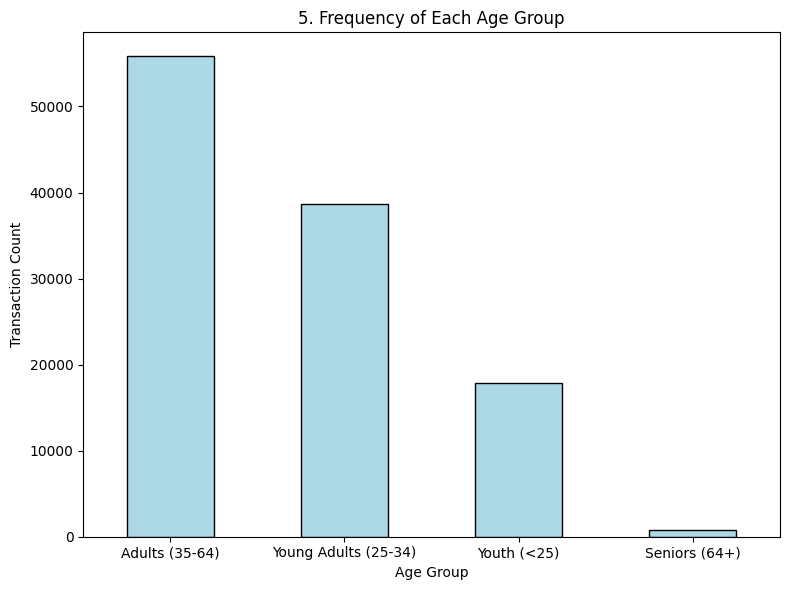

In [ ]:
# Practice Exercises for Analysis 11:

# 1. List age groups and their counts
age_group_counts = df['Age_Group'].value_counts()
print("1. Age Groups and Their Counts:")
print(age_group_counts)

# 2. Find the least common age group
least_common_age_group = age_group_counts.idxmin()
print(f"\n2. Least Common Age Group: {least_common_age_group}")

# 3. Calculate the total revenue for each age group
age_group_total_revenue = df.groupby('Age_Group')['Revenue'].sum()
print("\n3. Total Revenue for Each Age Group:")
print(age_group_total_revenue)

# 4. Compare average revenue per transaction for different age groups
age_group_avg_revenue = df.groupby('Age_Group')['Revenue'].mean()
print("\n4. Average Revenue Per Transaction for Each Age Group:")
print(age_group_avg_revenue)

# 5. Create a bar chart showing the frequency of each age group
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("5. Frequency of Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. Total Revenue for Each Year-Month Combination:
Year-Month
2011-01     675193
2011-02     637598
2011-03     708517
2011-04     698782
2011-05     734537
            ...   
2016-03    2608663
2016-04    2756864
2016-05    3264343
2016-06    3586300
2016-07     499960
Freq: M, Name: Revenue, Length: 62, dtype: int64

2. Year with the Highest Sales: 2015

3. Sales in the First Half of 2020: $0.00
   Sales in the Second Half of 2020: $0.00


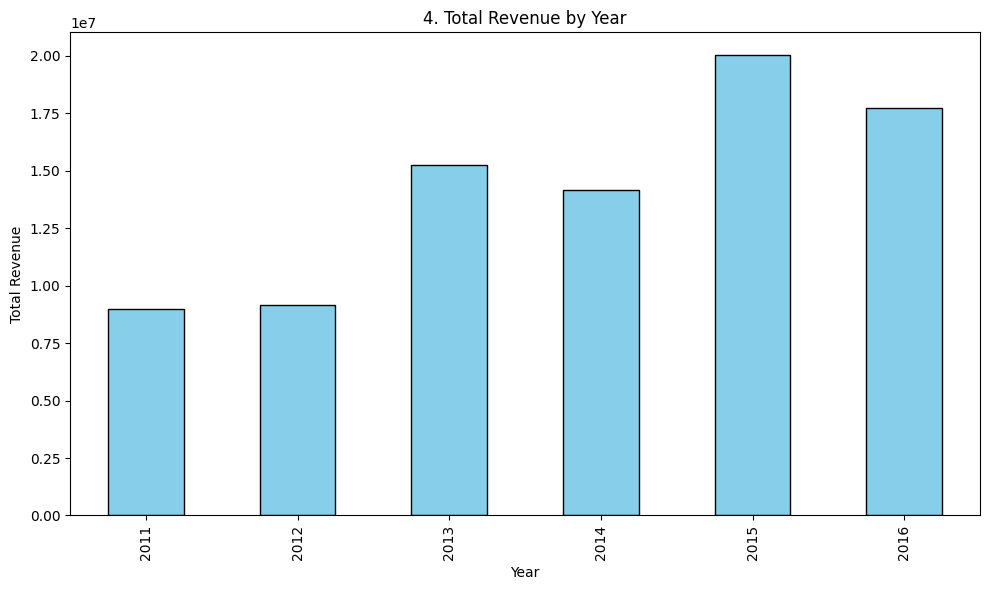


5. Average Revenue Per Transaction for Each Year:
Date
2011    3348.856182
2012    3427.711244
2013     623.492902
2014     481.417920
2015     819.211676
2016     602.537077
Name: Revenue, dtype: float64


In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 1. Calculate total revenue for each year-month combination
df['Year-Month'] = df['Date'].dt.to_period('M')
total_revenue_by_year_month = df.groupby('Year-Month')['Revenue'].sum()
print("1. Total Revenue for Each Year-Month Combination:")
print(total_revenue_by_year_month)

# 2. Determine the year with the highest sales
total_revenue_by_year = df.groupby(df['Date'].dt.year)['Revenue'].sum()
year_with_highest_sales = total_revenue_by_year.idxmax()
print(f"\n2. Year with the Highest Sales: {year_with_highest_sales}")

# 3. Compare sales between the first half and second half of a specific year (e.g., 2020)
year_of_interest = 2020
first_half_revenue = df[(df['Date'].dt.year == year_of_interest) & (df['Date'].dt.month <= 6)]['Revenue'].sum()
second_half_revenue = df[(df['Date'].dt.year == year_of_interest) & (df['Date'].dt.month > 6)]['Revenue'].sum()
print(f"\n3. Sales in the First Half of {year_of_interest}: ${first_half_revenue:,.2f}")
print(f"   Sales in the Second Half of {year_of_interest}: ${second_half_revenue:,.2f}")

# 4. Plot a bar chart of total revenue by year
plt.figure(figsize=(10, 6))
total_revenue_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("4. Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# 5. Find the average revenue per transaction for each year
average_revenue_by_year = df.groupby(df['Date'].dt.year)['Revenue'].mean()
print("\n5. Average Revenue Per Transaction for Each Year:")
print(average_revenue_by_year)

In [ ]:
# 1. Print the total profit for each product category
total_profit_by_category = df.groupby('Product_Category')['Profit'].sum()
print("1. Total Profit for Each Product Category:")
print(total_profit_by_category)

# 2. Find the product category with the lowest total profit
lowest_profit_category = total_profit_by_category.idxmin()
print(f"\n2. Product Category with the Lowest Total Profit: {lowest_profit_category}")

# 3. Compare the total profit of the two highest-profit product categories
top_two_profit_categories = total_profit_by_category.nlargest(2)
print("\n3. Total Profit of the Two Highest-Profit Product Categories:")
print(top_two_profit_categories)

# 4. Calculate the profit margin (Profit/Revenue) for each product category
df['Profit Margin'] = df['Profit'] / df['Revenue']
profit_margin_by_category = df.groupby('Product_Category')['Profit Margin'].mean()
print("\n4. Profit Margin (Profit/Revenue) for Each Product Category:")
print(profit_margin_by_category)

# 5. Plot a bar chart showing total profit for all product categories
plt.figure(figsize=(10, 6))
total_profit_by_category.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("5. Total Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

1. Transaction with the Lowest Profit:
Date                            2015-12-17 00:00:00
Day                                              17
Month                                      December
Year                                           2015
Customer_Age                                     27
Age_Group                      Young Adults (25-34)
Customer_Gender                                   F
Country                                      France
State                                       Yveline
Product_Category                           Clothing
Sub_Category                                Jerseys
Product             Short-Sleeve Classic Jersey, XL
Order_Quantity                                   31
Unit_Cost                                        42
Unit_Price                                       54
Profit                                          -30
Cost                                           1302
Revenue                                        1272
Year-Month               

IndexError: invalid index to scalar variable.

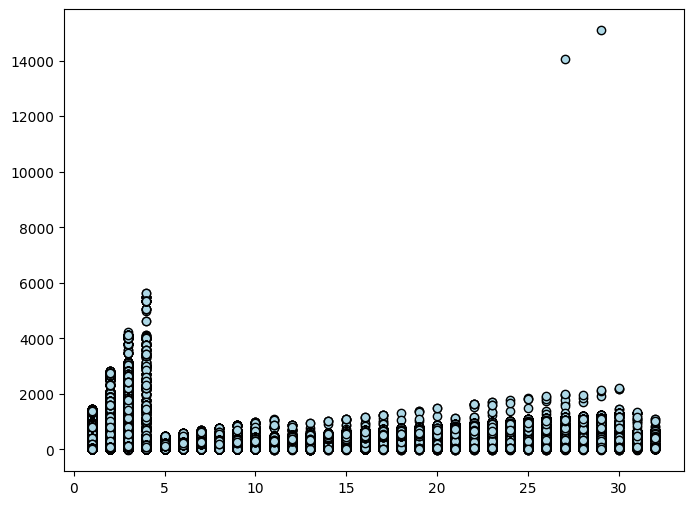

In [ ]:
# 1. Find the transaction with the lowest profit
lowest_profit_transaction = df.loc[df['Profit'].idxmin()]
print("1. Transaction with the Lowest Profit:")
print(lowest_profit_transaction)

# 2. Calculate the average profit of the top 10% most profitable transactions
top_10_percent = df.nlargest(int(len(df) * 0.1), 'Profit')
avg_profit_top_10_percent = top_10_percent['Profit'].mean()
print(f"\n2. Average Profit of Top 10% Most Profitable Transactions: ${avg_profit_top_10_percent:,.2f}")

# 3. Identify all transactions that exceed a specified profit threshold
profit_threshold = 500  # Change this threshold as needed
transactions_above_threshold = df[df['Profit'] > profit_threshold]
print(f"\n3. Number of Transactions Exceeding Profit Threshold of ${profit_threshold}: {transactions_above_threshold.shape[0]}")

# 4. Compare the profit of the most profitable transaction to the median profit
most_profitable_transaction = df.loc[df['Profit'].idxmax()]['Profit']
median_profit = df['Profit'].median()
print(f"\n4. Most Profitable Transaction Profit: ${most_profitable_transaction:,.2f}")
print(f"   Median Profit: ${median_profit:,.2f}")

# 5. Plot a scatter plot of 'Profit' vs. 'Order_Quantity' and highlight the most profitable transaction
plt.figure(figsize=(8, 6))
plt.scatter(df['Order_Quantity'], df['Profit'], color='lightblue', edgecolors='black', label='Transactions')
plt.scatter(most_profitable_transaction['Order_Quantity'], most_profitable_transaction['Profit'], color='red', s=100, label='Most Profitable Transaction')
plt.title("5. Scatter Plot of 'Profit' vs. 'Order_Quantity' (Most Profitable Transaction Highlighted)")
plt.xlabel("Order Quantity")
plt.ylabel("Profit")
plt.legend()
plt.tight_layout()
plt.show()

1. Average Order Quantity for Each Country:
Country
Australia         11.012074
Canada            13.560375
France            11.728951
Germany           11.328167
United Kingdom    11.543172
United States     12.180253
Name: Order_Quantity, dtype: float64

2. Country with the Lowest Average Order Quantity: Australia

3. Number of Transactions Across Countries:
Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

4. Average Profit Per Transaction for Each Country:
Country
Australia         283.089489
Canada            262.187615
France            261.891435
Germany           302.756803
United Kingdom    324.071439
United States     282.447687
Name: Profit, dtype: float64


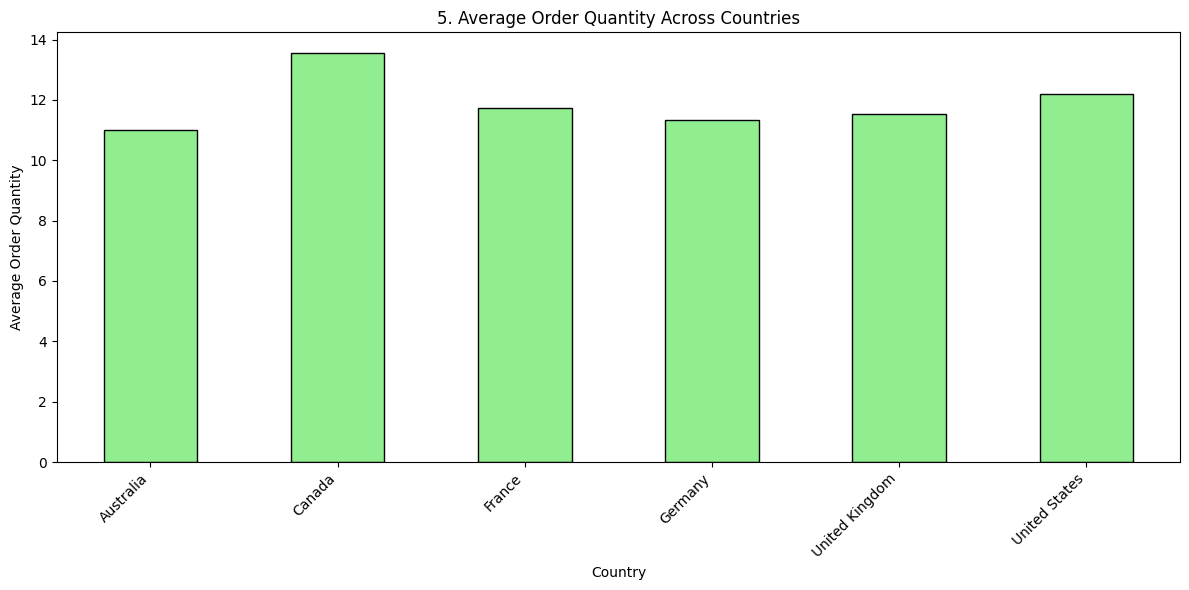

In [ ]:

# 1. Print the average order quantity for each country
avg_order_quantity_by_country = df.groupby('Country')['Order_Quantity'].mean()
print("1. Average Order Quantity for Each Country:")
print(avg_order_quantity_by_country)

# 2. Find the country with the lowest average order quantity
country_with_lowest_order_qty = avg_order_quantity_by_country.idxmin()
print(f"\n2. Country with the Lowest Average Order Quantity: {country_with_lowest_order_qty}")

# 3. Compare the number of transactions across countries
transactions_by_country = df['Country'].value_counts()
print("\n3. Number of Transactions Across Countries:")
print(transactions_by_country)

# 4. Calculate the average profit per transaction for each country
avg_profit_by_country = df.groupby('Country')['Profit'].mean()
print("\n4. Average Profit Per Transaction for Each Country:")
print(avg_profit_by_country)

# 5. Plot a bar chart comparing average order quantities across countries
plt.figure(figsize=(12, 6))
avg_order_quantity_by_country.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("5. Average Order Quantity Across Countries")
plt.xlabel("Country")
plt.ylabel("Average Order Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()